In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import datetime

# Data Analysis

I will start by doing a small EDA over the data to have a better understanding. The goal here is not running deep analysis but instead to open doors for future deeper analysis.

## import data

In [ ]:
df = pd.read_csv("/home/elbaz/Bureau/stampli_HA/disney-reviews/DisneylandReviews.csv", encoding="latin-1")

In [ ]:
df.info()

In [ ]:
df.head()

1. no missing values

2. 42k rows 

## Visualize Rating

In [ ]:
df.Rating.plot.hist()
plt.show()

1. rating distribution is not uniform

2. Most of people are happy about disneyland parks

## Time Analysis

In [ ]:
df.Year_Month.value_counts()

In [ ]:
# remove all missing values (Year_Month=="missing")
df = df[df.Year_Month != "missing"]

# split year and month from date (format year-month)
df['year'] = df.Year_Month.apply(lambda x: x.split('-')[0])
df['month'] = df.Year_Month.apply(lambda x: x.split('-')[1])

# year month to int type
df.year = df.year.astype(int)
df.month = df.month.astype(int)

# remove Year_Month column
df = df.drop(columns=['Year_Month'])

In [ ]:
df.year.value_counts()

In [ ]:
df.month.value_counts()

In [ ]:
sns.boxplot(x="month", y="Rating", data=df)
plt.show()

1. the data is from 2010 and 2019

2. 2015 is the year with most of the samples.

3. The months with the most of samples are the onces for vacation (summer) and also holidays (like december - christmas).

4. The distribution of the rating according to the month seems to be the same but more analysis must done here (correlation between rating and month (as category)) - this can be helpful if during the year the level of park's services is the same.

## Location Analysis

In [ ]:
df.Reviewer_Location.value_counts()[:20]

We can join countries to world regions to have a global analyis.

In [ ]:
def get_country_region(country):
    """
    Returns the world region for a given country.
    
    Args:
        country (str): The name of the country
        
    Returns:
        str: The world region name, or "Unknown" if country not found
    """
    
    # Define the 8 world regions and their countries
    regions = {
        "North America": [
            'United States', 'Canada', 'Mexico', 'Guatemala', 'Honduras', 
            'Nicaragua', 'Costa Rica', 'Panama', 'Cuba', 'Haiti', 
            'Dominican Republic', 'Jamaica', 'The Bahamas', 'Barbados', 
            'Trinidad and Tobago', 'Antigua and Barbuda', 'Grenada',
            'Puerto Rico', 'U.S. Virgin Islands', 'Turks and Caicos Islands',
            'Cayman Islands', 'Aruba', 'Curaçao', 'Caribbean Netherlands'
        ],
        
        "South America": [
            'Brazil', 'Argentina', 'Chile', 'Peru', 'Colombia', 'Venezuela',
            'Ecuador', 'Bolivia', 'Paraguay', 'Uruguay', 'Guyana', 'Suriname',
            'French Guiana', 'Falkland Islands (Islas Malvinas)'
        ],
        
        "Europe": [
            'United Kingdom', 'France', 'Germany', 'Italy', 'Spain', 'Netherlands',
            'Belgium', 'Switzerland', 'Austria', 'Sweden', 'Norway', 'Denmark',
            'Finland', 'Portugal', 'Greece', 'Ireland', 'Croatia', 'Romania',
            'Ukraine', 'Poland', 'Czechia', 'Hungary', 'Bulgaria', 'Serbia',
            'Montenegro', 'Bosnia and Herzegovina', 'Slovenia', 'Slovakia',
            'Estonia', 'Latvia', 'Lithuania', 'Iceland', 'Malta', 'Cyprus',
            'Luxembourg', 'North Macedonia', 'Albania', 'Moldova', 'Monaco',
            'Andorra', 'Jersey', 'Guernsey', 'Isle of Man', 'Gibraltar',
            'Åland Islands'
        ],
        
        "Asia": [
            'China', 'India', 'Japan', 'South Korea', 'Indonesia', 'Thailand',
            'Malaysia', 'Singapore', 'Philippines', 'Vietnam', 'Myanmar (Burma)',
            'Cambodia', 'Laos', 'Taiwan', 'Hong Kong', 'Macau', 'Mongolia',
            'Kazakhstan', 'Uzbekistan', 'Afghanistan', 'Pakistan', 'Bangladesh',
            'Sri Lanka', 'Nepal', 'Iran', 'Iraq', 'Turkey', 'Armenia',
            'Azerbaijan', 'Georgia', 'Brunei', 'Timor-Leste', 'Maldives'
        ],
        
        "Middle East": [
            'Saudi Arabia', 'United Arab Emirates', 'Qatar', 'Kuwait', 'Bahrain',
            'Oman', 'Yemen', 'Israel', 'Palestine', 'Jordan', 'Lebanon', 'Syria'
        ],
        
        "Africa": [
            'South Africa', 'Egypt', 'Nigeria', 'Kenya', 'Uganda', 'Tanzania',
            'Ethiopia', 'Ghana', 'Morocco', 'Algeria', 'Tunisia', 'Libya',
            'Sudan', 'South Sudan', 'Rwanda', 'Zambia', 'Zimbabwe', 'Botswana',
            'Namibia', 'Mali', 'Senegal', "Côte d'Ivoire", 'Mozambique',
            'Madagascar', 'Mauritius', 'Seychelles', 'Democratic Republic of the Congo',
            'Malawi', 'El Salvador'
        ],
        
        "Oceania": [
            'Australia', 'New Zealand', 'Fiji', 'Papua New Guinea', 'Vanuatu',
            'Solomon Islands', 'Cook Islands', 'French Polynesia', 'Guam',
            'Northern Mariana Islands'
        ],
        
        "Russia & Central Asia": [
            'Russia'
        ]
    }
    
    # Create a reverse mapping from country to region
    country_to_region = {}
    for region, countries in regions.items():
        for country_name in countries:
            country_to_region[country_name] = region
    
    # Return the region for the given country
    return country_to_region.get(country, "Unknown")

# apply function to country column
df['Reviewer_Global_Region'] = df.Reviewer_Location.apply(get_country_region)


In [ ]:
df.Reviewer_Global_Region.value_counts()

In [ ]:
sns.boxplot(x="Reviewer_Global_Region", y="Rating", data=df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
sns.boxplot(x="Reviewer_Location", y="Rating", data=df[df.Reviewer_Location.isin(df.Reviewer_Location.value_counts().index[:20])])
plt.xticks(rotation=90)
plt.show()

1. North America and Europe are the most consumers of disneyland parcs and reviewers.

2. Europe and South America are regions where people rate less the disneyland park experience or are more willing to rate negatively the disneyland park.

3. We can got further on part of the analysis to understand with region or countries are more strictin their ratings. (correlation or statistical test to see if there is any dependence between location and rating.)

## Branch

In [ ]:
df.Branch.value_counts()

In [ ]:
sns.boxplot(x="Branch", y="Rating", data=df)
plt.show()

1. The paris Branch suffers more from small ratings than HongKong and California

## Review Text

In [ ]:
df.Review_Text.sample(10).values

In [ ]:
df[df.Reviewer_Location=='France'].Review_Text.sample(10).values

In [ ]:
df[df.Reviewer_Location=='France'].Rating.describe()

Let s focus on country France with 223 reviews and validate the pipeline.

In [ ]:
df_fr = df[df.Reviewer_Location == "France"]

### New features Extraction

With LLM we can extract more data from the reviews and after reading some examples here are the features I decide to extract:

1. OVERALL SENTIMENT: Determine if the review is positive, negative, or neutral with a confidence score.

2. ASPECT-BASED SENTIMENT: Analyze sentiment for each aspect ONLY if mentioned in the review:
   - Attractions/rides
   - Food & restaurants  
   - Hotels & resorts
   - Staff friendliness
   - Price & value for money
   - Crowd management & waiting times
   - Cleanliness & safety
   - Accessibility (mobility, languages, dietary needs)
   
   Use "not_mentioned" if an aspect isn't discussed.

3. VISITOR DEMOGRAPHICS: Infer from text clues:
   - Visitor type (families, couples, solo travelers, groups)
   - Origin (international vs local visitors)
   - Presence of children

4. TRIP CONTEXT:
   - Visit frequency (first-time, returning, frequent visitor)
   - Special occasions (birthday, honeymoon, holidays, etc.)
   - Trip duration

5. TIME DIMENSION:
   - Season/month if mentioned
   - Day type (weekday/weekend/holiday)

6. PURCHASE MENTIONS: Note any mentions of:
   - Tickets, fast passes, souvenirs, food, hotels, parking

7. ENGAGEMENT SIGNALS:
   - Time spent
   - Specific attractions mentioned
   - Intent to return or recommend

8. PAIN POINTS:
   - Main complaints
   - Where in the journey problems occurred
   - Severity of issues


All of this features will help to query the data and answers all kind of questions.

**Important: do not run the following cell, the data generated is already stored**

In [ ]:
from disney_review_analyzer import DisneyReviewAnalyzer

analyzer = DisneyReviewAnalyzer(
    model_name="gpt-4o-mini",
    batch_size=10,
    max_concurrency=5
)

res = await analyzer.analyze_df_async(df_fr, output_path="disney-reviews/disney_reviews_fr_analysis.csv")

The DisneyReviewAnalyzer service allows to extract these features using LLM structured output with the package LangChain using batch asynchronous methodology.

To run it on 40k samples will take hours and a lot of my tokens so that s why I decided to filter only France samples for now.

# Natural Language Question

In [2]:
df_fr_analyzed = pd.read_csv("disney-reviews/disney_reviews_fr_analysis.csv").reset_index(drop=True)

# apply some corrections
# fill missing values using DataFrame-level fillna method
df_fr_analyzed = df_fr_analyzed.fillna({
    'has_children': False,
    'popular_attractions': 'unknown',
    'main_complaint': 'not_mentioned'
})

# reformat popular_attractions column to list of strings
df_fr_analyzed['popular_attractions'] = df_fr_analyzed['popular_attractions'].apply(lambda x: x.split(';') if isinstance(x, str) else [])

# correct main_complaint column
df_fr_analyzed['main_complaint'] = df_fr_analyzed['main_complaint'].apply(lambda x: "not_mentioned" if x in ['none', 'not mentioned'] else x)

# re add month column - was overwritten by the LLM extraction
df_fr_analyzed['month'] = random.choices(range(1, 13), k=len(df_fr_analyzed))

# remove year column - because I suppose uniformity of the data across the years
df_fr_analyzed = df_fr_analyzed.drop(columns=['year'])

# change month number to month name
df_fr_analyzed['month'] = df_fr_analyzed['month'].apply(lambda x: datetime.datetime(1900, int(x), 1).strftime('%B'))

/tmp/ipykernel_255090/891696218.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_fr_analyzed = df_fr_analyzed.fillna({


In [3]:
df_fr_analyzed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Review_ID                223 non-null    int64  
 1   Rating                   223 non-null    int64  
 2   Reviewer_Location        223 non-null    object 
 3   Review_Text              223 non-null    object 
 4   Branch                   223 non-null    object 
 5   month                    223 non-null    object 
 6   Reviewer_Global_Region   223 non-null    object 
 7   overall_sentiment        223 non-null    object 
 8   sentiment_confidence     223 non-null    float64
 9   attractions_sentiment    223 non-null    object 
 10  food_sentiment           223 non-null    object 
 11  hotels_sentiment         223 non-null    object 
 12  staff_sentiment          223 non-null    object 
 13  price_sentiment          223 non-null    object 
 14  crowd_sentiment          2

## Example of analysis 

With these new features new analysis can be done. For example we analyze if the length of the review can say something about the overall_sentiment.

In [9]:
def two_d_histogram(df, x, y):
    crosstab_norm = pd.crosstab(df[x], df[y], normalize='index')
    fig, axe = plt.subplots(1, 1, figsize=(5, 5))

    sns.heatmap(crosstab_norm, annot=True, cmap='Oranges', fmt='.2f', ax=axe)
    axe.set_title(f'Normalized Heatmap: Proportions within each {x} and {y}')
    axe.set_xlabel(x)
    axe.set_ylabel(y)

    plt.tight_layout()
    plt.show()

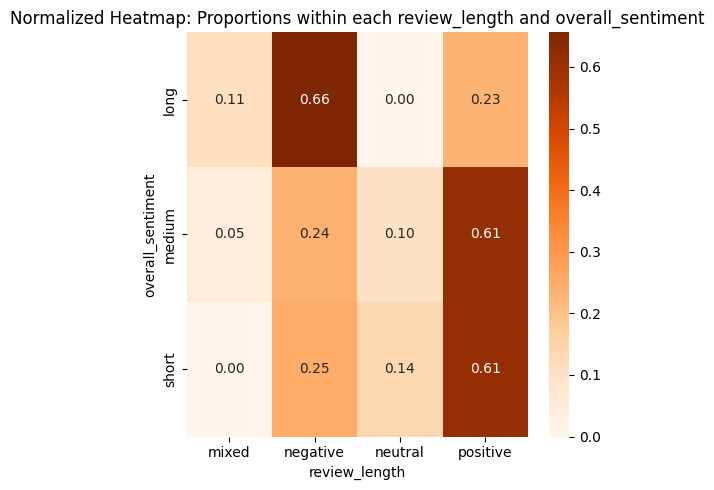

In [10]:
two_d_histogram(df_fr_analyzed, 'review_length', 'overall_sentiment')

Here we see that long review related more to negative overall sentiment whereas short review descibes positive feedback.

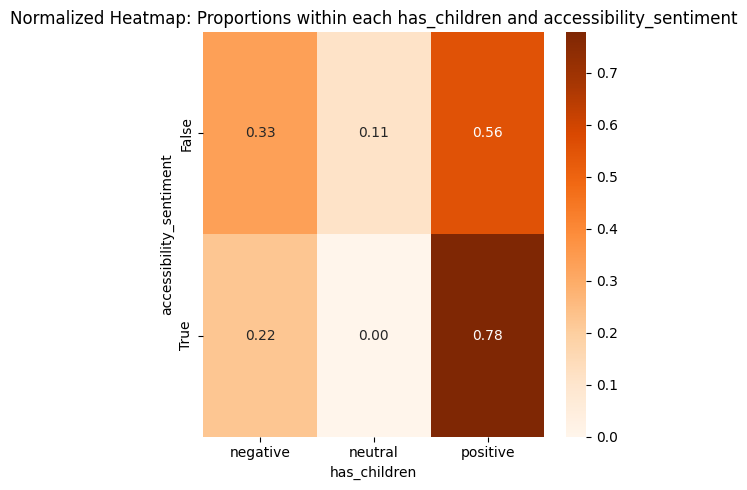

In [14]:
two_d_histogram(df_fr_analyzed[df_fr_analyzed.accessibility_sentiment != 'not_mentioned'], 'has_children', 'accessibility_sentiment')

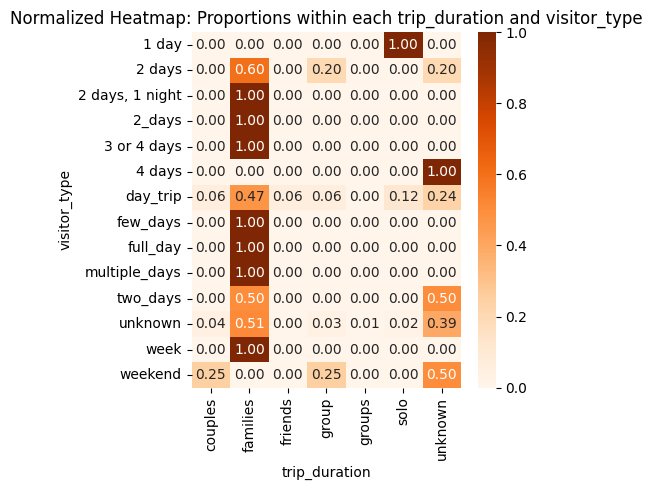

In [15]:
two_d_histogram(df_fr_analyzed, 'trip_duration', 'visitor_type')

We can notice some erros of new features generated by the LLM and langchain structured output. This was expected while I used cursor to help me building this LLM information retrieval. Moreover I focused on asynchronous batching so I let on the side some small errors of types and prompt misconception. 

However we can see the power of such pipeline and give us the ability to do new analysis on featues generated without human interactions.

About the evaluation of this phase I will recommend:
1. human evaluation
2. build test-set and evaluate mathematically the prediction (if we have a test set)
3. Run several time the same sample to use voting or majority techniques
4. clustering - regroup review textes by group and verify if each group has small variability within the new features.

## Mixture Of Encoders and Natural Language Query

I am going to use the package Superlinked which allows to embedd different data types then to query it simultaneously - query using semantic similarity used in RAG and sql queryinf together. 

Instead of building a pipeline that differentiate text similarity and hard coded filtering, mixture of encoders bypass this problematic and in addition Superlinked integrated also a method using LLM that convert natural language question to actionnable inputs for the query.

https://docs.superlinked.com/

I connected superlinked to langchain to create a real RAG system:
1. superlinke retrieves the samples closes to the question.
2. langchain integrates this retrieved sample as context for LLM to answers the question.

In [3]:
from disney_superlinked import create_disney_rag_system_with_nlq

# Create RAG system with natural language support
# IMPORTANT: it takes some time to parse and load the data. few minutes (5minutes for 223 rows with an old ubuntu ..)
qa_chain, app = create_disney_rag_system_with_nlq(df_fr_analyzed)

2025-08-26 17:14:29 [debug    ] YAML configuration not available, falling back to dotenv error=KeyError('yaml_config_section key "framework" not found in config.yaml')
2025-08-26 17:14:29 [debug    ] YAML configuration not available, falling back to dotenv error=KeyError('yaml_config_section key "resource" not found in config.yaml')
2025-08-26 17:14:29 [debug    ] YAML configuration not available, falling back to dotenv error=KeyError('yaml_config_section key "resource" not found in config.yaml')
2025-08-26 17:14:29 [debug    ] YAML configuration not available, falling back to dotenv error=KeyError('yaml_config_section key "resource" not found in config.yaml')
✅ OpenAI configuration set up for natural language querying
✅ Natural language query created successfully
✅ Superlinked application initialized successfully
✅ Indexed 223 Disney reviews successfully
✅ Disney RAG system ready with 223 reviews


In [4]:
# Ask questions
question = "what are the most common complaints when overall sentiment is negative?"
result = qa_chain(question)
print(result['result'])

/tmp/ipykernel_255090/58449325.py:3: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  result = qa_chain(question)


Based on the review excerpts provided, the overall sentiment towards Disneyland is predominantly positive, with many visitors expressing enjoyment and satisfaction with their experiences. However, there are notable complaints that emerge when the sentiment is negative. Here’s a comprehensive analysis of the common complaints and insights derived from the reviews:

### Overall Sentiment Patterns
- **Positive Sentiment**: Many visitors describe their experiences as magical, fun, and nostalgic. They appreciate the cleanliness of the parks, the friendliness of the staff, and the overall atmosphere. Even those who initially approached the park with skepticism often found themselves pleasantly surprised.
- **Negative Sentiment**: Complaints typically arise from issues related to food quality and pricing, long wait times, and perceived service shortcomings. Some visitors express frustration with the crowds and the consumerist culture associated with Disney.

### Visitor Demographics
- **Famil

In [5]:
result['source_documents']

[Document(metadata={'review_id': '431884138', 'overall_sentiment': 'positive', 'sentiment_confidence': 0.95, 'attractions_sentiment': 'positive', 'food_sentiment': 'not_mentioned', 'staff_sentiment': 'positive', 'price_sentiment': 'not_mentioned', 'visitor_type': 'unknown', 'visit_frequency': 'unknown', 'recommendation_intent': 'yes', 'main_complaint': 'not_mentioned', 'popular_attractions': "['unknown']", 'satisfaction_score': 9.05, 'rating': 5, 'season': 'unknown', 'month': 'May', 'has_children': 'False', 'repeat_visits': 'False'}, page_content='Came to disneyland and had a great day. Not a lot of queues to do before the attractions. Very gentle staff always smiling. Very clean and well maintained.   Recommended'),
 Document(metadata={'review_id': '115605447', 'overall_sentiment': 'positive', 'sentiment_confidence': 0.95, 'attractions_sentiment': 'positive', 'food_sentiment': 'negative', 'staff_sentiment': 'positive', 'price_sentiment': 'negative', 'visitor_type': 'group', 'visit_fre